In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 2024 Stack Overflow Developer Survey

Chapters 1-4 were the building blocks for Chapter 5 and onwards. As we learn new concepts, it is useful to apply these to real data. Since the creative brief is related to survey data, I selected a survey dataset: 2024 Stack Overflow Developer Survey. We will use this data from now on, so it is a good idea to be familiar with it.

The survey data is provided together with notebooks in the GitHub repo. Alternatively, you can access the data from here: https://survey.stackoverflow.co/

In [2]:
survey = pd.read_csv('survey_results_public.csv')
survey.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


The survey comes with a pdf including all the questions and choices. It is helpful to take a look at that before exploring the results.

## 2. Confidence Intervals for a Proportion (Page 181 - Section 5.2)

Let's say we would like to answer the following question:

What percentage of the professional software developers who are active now are working remotely?

We do not have access to the whole population but the stack overflow survey is as good as it gets. Let's first check how many people has responded.

In [3]:
len(survey)

65437

And let's check how many of these are professional software developers i.e. the ones who answered the question "Which of the following options best describes you today?" as "
I am a developer by profession":

In [4]:
developers = survey[survey['MainBranch'] == 'I am a developer by profession']

In [5]:
num_developers = len(developers)
num_developers

50207

Now we can check the answers to the question

Which best describes your current work situation?
- Remote
- In-person
- Hybrid (some remote, some in-person)

but first let's check how many of the 50207 professional developers answered this question:

In [6]:
len(developers.dropna(subset=['RemoteWork']))

47223

In [7]:
len(developers.dropna(subset=['RemoteWork']))/len(developers)

0.9405660565259825

so we have around 6% missing data. There are various ways to handle missing data, for now 6% is quite low so let's drop these rows: 

In [8]:
developers = developers.dropna(subset=['RemoteWork'])
developers.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
11,12,I am a developer by profession,45-54 years old,"Employed, full-time",In-person,Apples,Hobby;School or academic work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN


Now we can find out the proportion we are looking for:

In [9]:
counts = developers['RemoteWork'].value_counts()
counts

RemoteWork
Hybrid (some remote, some in-person)    19767
Remote                                  18759
In-person                                8697
Name: count, dtype: int64

In [10]:
n = len(developers)
n

47223

In [11]:
proportions = counts/n
proportions

RemoteWork
Hybrid (some remote, some in-person)    0.418588
Remote                                  0.397243
In-person                               0.184169
Name: count, dtype: float64

In [12]:
p_hat = proportions.values[1]
p_hat

0.39724286894098215

Using our sample ($n=47223$), our point estimate is $\hat{p}$ = 0.397. Let's create 95% CI for this point estimate.


Let's verify the conditions for sampling distribution to be normal (CLT):

In [13]:
n * p_hat >= 10

True

In [14]:
n * (1-p_hat) >= 10

True

we assume that the survey respondents are independent.

We know that for 95% CI, z-score is ~1.96. But it is useful to be able to calculate this value in Python for different confidence levels. In notebook 4 you have learned `scipy.stats.norm.cdf` which for a given z, gave us the percentile. `scipy.stats.norm.ppf` is the inverse i.e. for a given percentile, it gives the z value.

In [15]:
from scipy.stats import norm
# cdf: z -> percentile
norm.cdf(1.96)

0.9750021048517795

In [16]:
# ppf: percentile -> z
norm.ppf(0.975)

1.959963984540054

Remember, a 95% confidence interval leaves 2.5% in each tail of the distribution—2.5% on the left and 2.5% on the right. Therefore, to find the critical z-value, we look for the z-value that corresponds to the cumulative probability of 97.5% (95% + 2.5%).

In [17]:
z = norm.ppf(0.975)
z

1.959963984540054

which in fact is ~1.96. The next step is to calculate the standard error

$SE=\sqrt\frac{p*(1-p)}{n}$

which we estimate by plugging in our point estimate

$SE=\sqrt\frac{\hat{p}*(1-\hat{p})}{n}$

In [18]:
se = np.sqrt(p_hat * (1-p_hat)/n)
se

0.002251761796581073

In [19]:
margin_of_error = z * se
margin_of_error

0.00441337202306211

In [20]:
p_hat + margin_of_error

0.4016562409640443

In [21]:
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

In [22]:
print(f"{p_hat*100:.1f} (95% CI: {lower_bound*100:.1f}% - {upper_bound*100:.1f}%)")

39.7 (95% CI: 39.3% - 40.2%)


## 3. Hypothesis testing for a proportion (Page 189 - Section 5.3)

Last year, 41% of professional developers were working remotely. In practice, you rarely have access to exact population parameters. However, for the purpose of this exercise, let's assume we know that 41% represents the true population proportion from last year. In the next chapter, you will learn how to compare two samples (e.g., last year's survey vs. this year's survey).

For now, let's explore whether the proportion of developers working remotely has changed this year by testing if it remains at 41%.

EXERCISE

Set up hypotheses to evaluate this scenario:








In [23]:
# NO NEED TO CODE JUST WRITE DOWN THE HYPOTHESES ON PAPER
# then, check solution
# H0: The proportion of developers hasn't changed since last year p=0.41 
# H1: The proportion of developers has changed since last year p different from 0.41

The proportion of software developers working remotely this year is the same as last year, which is 41%.

$H_0: p = 0.41$

The proportion of software developers working remotely this year is different from 43%, indicating a change.

$H_A: p \neq 0.41$

In [24]:
p_0 = 0.41

In [25]:
p_hat

0.39724286894098215

EXERCISE

Assuming the null hypothesis is true, let's calculate the probability of observing a sample proportion as extreme as $\hat{p}$ or more extreme. (Which, if you remember, is the definition of p value)

Use a significance level of $α = 0.01$ to evaluate the hyptheses.

In [26]:
alpha = 0.01

In [27]:
# YOUR CODE HERE
se = np.sqrt(p_0 * (1-p_0)/n)
se

0.002263294913316033

In [28]:
# Remember we need to use p_0 instead of p_hat
se = np.sqrt(p_0 * (1-p_0)/n)
se

0.002263294913316033

In [29]:
z = (p_hat - p_0) / se
z

-5.636530610289272

In [30]:
# This will give us the left tail area
norm.cdf(z)

8.67551029637717e-09

we need to multiply this by 2 to include the right tail area, which will be the p-value:

In [31]:
p_value = 2*norm.cdf(z)
p_value

1.735102059275434e-08

since p_value is much less than alpha, we reject the null hypothesis; data provides strong evidence supporting the alternative hypothesis.

In [32]:
p_value < alpha

True

## 4. Interactive Visualization of P-Values and Z-Scores

Interactive visualizations are a powerful tool for understanding the relationship between p-values and z-scores.

1. First write a function to plot normal distribution given any z-value

2. Let's make it interactive with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) 💃

In [33]:
def plot_normal_distribution(z):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Normal distribution
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)  # Standard normal distribution
    ax.plot(x, y, label="Normal Distribution", color="blue")
    
    # Shade the tails beyond the z-score
    ax.fill_between(x, 0, y, where=(x >= z), color='red', alpha=0.5)
    ax.fill_between(x, 0, y, where=(x <= -z), color='red', alpha=0.5)
    
    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(z))
    
    # Display the z-score and p-value
    ax.text(-3, 0.3, f'Z = {z:.2f}', fontsize=14, verticalalignment='center')
    ax.text(-3, 0.25, f'p-value = {p_value:.4f}', fontsize=14, verticalalignment='center')
    
    # Add vertical lines at the critical z-scores for a 95% confidence interval
    ax.axvline(x=1.96, color='green', linestyle='--', label='α = 0.05 threshold (1.96)')
    ax.axvline(x=-1.96, color='green', linestyle='--')
    
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Probability Density')
    ax.set_title('Normal Distribution with Hypothesis Test Limits (α = 0.05)')
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 0.45)
    ax.legend()
    

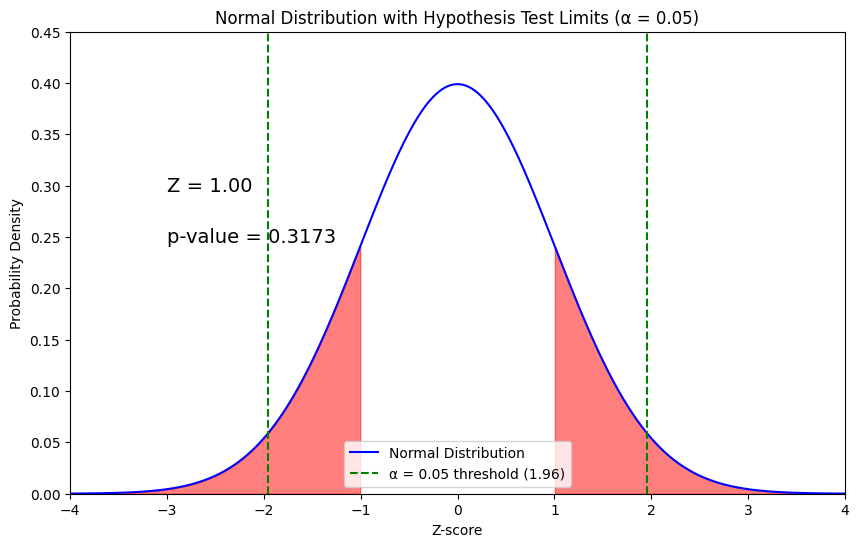

In [34]:
# Fail to reject the null hypothesis
plot_normal_distribution(z=1)

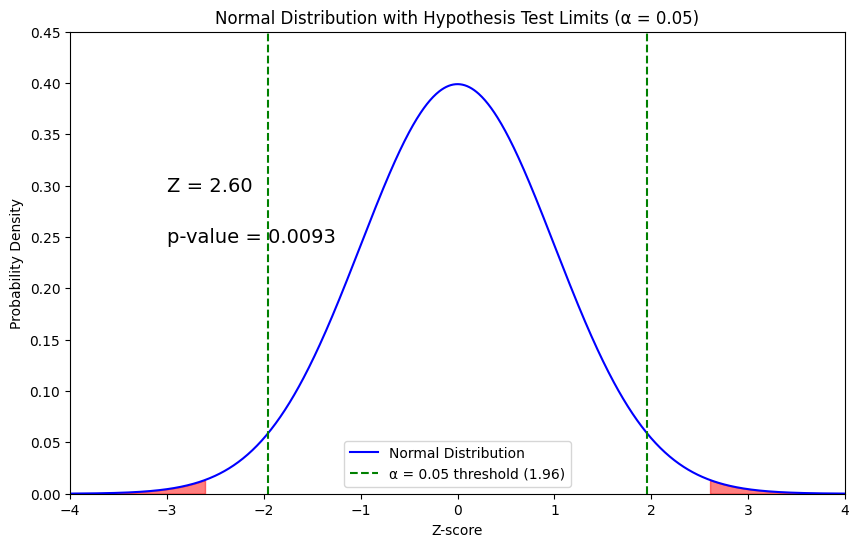

In [35]:
# Reject the null hypothesis
plot_normal_distribution(z=2.6)

In [36]:
import ipywidgets as widgets
from IPython.display import display

In [146]:
z_slider = widgets.FloatSlider(value=0, min=0, max=3, step=0.01, description='Z-score:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_normal_distribution, {'z': z_slider})
display(z_slider, interactive_plot)

## 5. Confidence intervals for evaluating machine learning models

When reporting model performance, it's essential to include a confidence interval alongside accuracy. Consider the following statements made by a data scientist:

1. "The model has 85% accuracy."
2. "The model has 85% accuracy (95% CI: 80% - 90%)."
3. "The model has 85% accuracy (95% CI: 84.5% - 85.5%)."

Although the reported accuracy is the same in all three cases, each statement conveys very different levels of certainty. The first statement provides no context about the reliability of the result. The second statement indicates that the accuracy could vary significantly, implying potential variability in model performance. The third statement, with a narrow confidence interval, suggests high confidence in the model's performance consistency.

Including a confidence interval not only strengthens the credibility of your report but also gives stakeholders a clearer understanding of the model's reliability.

For the following model, report the accuracy together with 95%CI:

In [37]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [38]:
X.shape, y.shape

((569, 30), (569,))

In [41]:
# Usually test size is between 0.2-0.33
# I selected 0.5
# I will explain down below in the solution
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)
X_train.shape, X_test.shape

((284, 30), (285, 30))

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
# YOUR CODE HERE

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of our model is {100*accuracy:.1f}% on the test set.')

The accuracy of our model is 95.8% on the test set.


Let's create a 95% CI for this point estimate. First let's verify the success-failure condition.

Important!!
Never use the CLT without checking success-failure condition. Hopefully you have done this in your solution above.

In [54]:
n = X_test.shape[0]
n

285

In [65]:
# n*(1-p) >= 10
print(n * (1-accuracy))
n * (1-accuracy) >= 10

12.000000000000005


True

In [81]:
# np >= 10
print(n * accuracy)
n * accuracy >= 10

273.0


True

success-failure conditions are satisfied, assuming the observations are independent:

In [82]:
se = np.sqrt(accuracy * (1-accuracy) / n)
se

0.011896101377047002

for 95% CI we take $z = 1.96$

In [86]:
z = 1.96
lower_bound = accuracy - z * se
upper_bound = accuracy + z * se
lower_bound, upper_bound

(0.9345783781430931, 0.9812110955411174)

In [91]:
# SOLUTION
print(f"{accuracy*100:.1f} (95% CI: {lower_bound*100:.1f}% - {upper_bound*100:.1f}%)")

95.8 (95% CI: 93.5% - 98.1%)


Did you figure out why I used test size = 0.5 instead of something less? The answer is below:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of our model is {100*accuracy:.1f}% on the test set.')

The accuracy of our model is 95.7% on the test set.


Let's check the success-failure condition:

In [98]:
n = X_test.shape[0]
n

188

In [100]:
print(n * (1-accuracy))
n * (1-accuracy) >= 10

7.999999999999991


False

In [102]:
print(n * accuracy)
n * accuracy >= 10

180.0


True

since success-failure fails, we cannot use the CLT. We will learn in the next chapter how to handle this.

## 6. A word on ChatGPT

Please be careful when using ChatGPT. I asked for CI calculation where success-failure condition fails, it calculated a CI anyway.

Prompt: "The test set contains 188 data points, and its accuracy was 98%. Calculate the 95% confidence interval."

<img src="https://i.imgur.com/vXAdfOQ.png" alt="Description of image" width="400"/>


only after I asked:

"Did you make any assumptions during this calculation? Did you verify the validity of these assumptions?"

<img src="https://i.imgur.com/WoffhNH.png" alt="Description of image" width="400"/>


additionally, in our textbook the threshold for success-failure condition is 10, but ChatGPT used 5.

[Here](https://chatgpt.com/share/ec85edde-bea7-4011-accd-ace88fb7152d) is my conversation with ChatGPT.

## 7. The Central Limit Theorem (Page 172 - Sections 5.1.3, 5.1.4, 5.1.5)

Did you know that there's an entire 400-page book dedicated to the history of the Central Limit Theorem? That’s how significant this theorem is. I know you're now very eager to read it, so here’s the link 🙂  [A History of the Central Limit Theorem.](https://link.springer.com/book/10.1007/978-0-387-87857-7)

CLT allows us to approximate the sampling distribution as a normal distribution, regardless of the shape of the population distribution, which in turn let's us do inference by only knowing the sample statistic.

Let's see this in action by creating a sampling distribution from the Bernoulli distribution. As you know, a Binomial distribution represents the number of successes in a fixed number of independent Bernoulli trials with $n$ the number of trials and $p$ the probability of success in each trial. If we set $n=1$ on `np.random.binomial()` we will get a Bernoulli distribution.

In [132]:
p = 0.2  # Probability of success
n = 1  # Number of trials 1 for Bernoulli distribution
population_size = 100000  # Population size

# Generate Bernoulli distribution
bernoulli_samples = np.random.binomial(n, p, population_size)

(array([79953.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20047.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

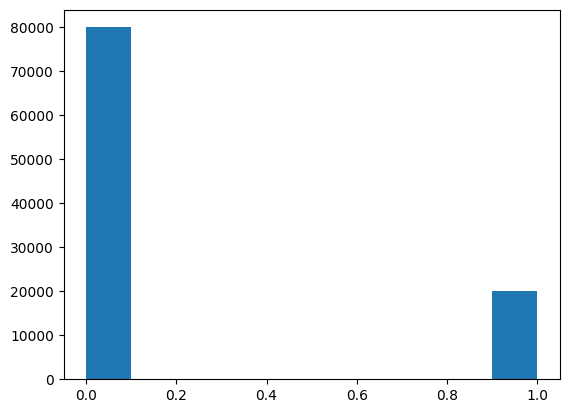

In [141]:
# This is a discrete probability distribution
# Which is clearly not normal
plt.hist(bernoulli_samples)

Now let's sample 100 trials and check the frequency of success, and repeat this many times to create the sampling distribution. Since we generated this data we know the population parameter $p=0.2$. So according to the CLT, the distribution of $\hat{p}$ (i.e. the sampling distribution) can be approximated by a normal distribution, centered at the population parameter $p=0.2$.

In [142]:
sample_size = 100
number_of_samples = 10000
p_hat_for_each_sample = []
for i in range(number_of_samples):
    sample = np.random.choice(bernoulli_samples, sample_size, replace=False)
    p_hat = np.mean(sample)
    p_hat_for_each_sample.append(p_hat)

(array([  11.,  102.,  696., 1879., 2819., 2567., 1336.,  466.,  107.,
          17.]),
 array([0.06 , 0.089, 0.118, 0.147, 0.176, 0.205, 0.234, 0.263, 0.292,
        0.321, 0.35 ]),
 <BarContainer object of 10 artists>)

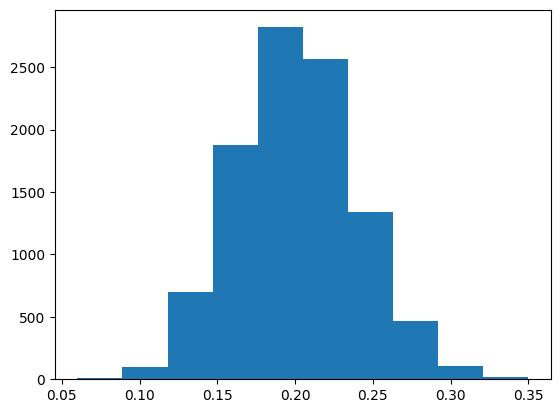

In [145]:
# sampling distribution
# approximately normal
plt.hist(p_hat_for_each_sample)

According to the CLT, mean of the sampling distribution is equal to $p=0.2$

In [148]:
np.mean(p_hat_for_each_sample)

0.200631

According to the CLT, standard deviation of the sampling distribution (which is standard error) is $\sqrt{\frac{p(1-p)}{n}}$

In [151]:
# Standard Error according to CLT
np.sqrt(0.2*(1-0.2)/sample_size)

0.04

In [154]:
# Standard Error according to our simulation
np.std(p_hat_for_each_sample)

0.040199898494896726

According to the CLT, the distribution is approximately normal, we can use the Q-Q plot to verify this:

Text(0.5, 1.0, 'Q-Q Plot')

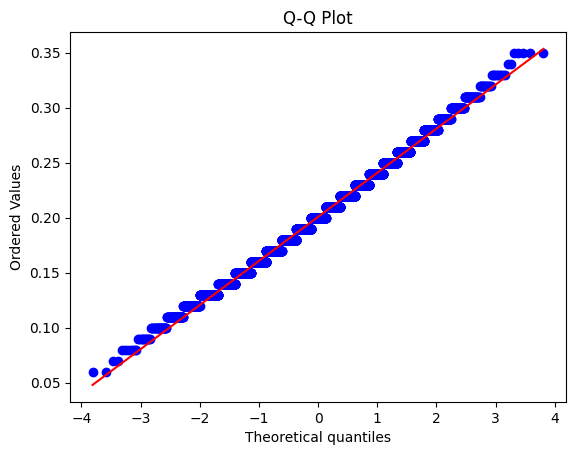

In [156]:
import scipy.stats as stats
stats.probplot(p_hat_for_each_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot')

what is a Q-Q plot? A Q-Q (quantile-quantile) plot is a graphical tool used to assess if a some data we have follows a particular distribution of interest, most commonly the normal distribution. The plot compares the quantiles of the dataset against the quantiles of a theoretical distribution. If the data points in the Q-Q plot lie approximately along a straight line, this suggests that the data follows the specified distribution. Deviations from this line indicate departures from the theoretical distribution being compared (in our case the red line represent the normal distribution), making the Q-Q plot a useful method for checking the normality assumption in statistical analyses. Take a look at the [wiki article](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) for more information.